# $$\textbf{Assigning loci to low-dimensional phenotypes using sparse regression} $$
The algorithm takes a matrix of additive effects, $F$, as input. Here $F \in \mathbb{R}^{E\times L}$, where $L$ is the
number of loci and $E$ is the number of environments. 


We'd like to split $F$ as $F = WM + b$, where $W \in \mathbb{R}^{E\times K}$, $M \in \mathbb{R}^{K\times L}$, $b \in \mathbb{R}^{1\times L}$  and $K$ is the number
of lower-dimensional phenotypes. The cost function minimized here is 
\begin{align}
\mathcal{C}(W,M,b) = ||F - (WM + b)||^2_F + \lambda_W \rho_1(W) + \lambda_M \rho_2(M),
\end{align}
where $W$ and $M$ are regularized by $\rho_1$ and $\rho_2$ respectively. The regularizers have to be chosen
such that the symmetry $W \to WB, M \to B^{-1}M$ is broken for an arbitrary invertible matrix $B$. Otherwise the procedure will lead to multiple solutions. 
To optimize for $W$, $M$ and $b$, we 
use an alternating minimization algorithm, where we 1) optimize $W$  fixing $M$, 2) optimize $M,b$
fixing $W$, 3) repeat 1 and 2 until convergence. For each step, we use standard linear regression methods from SciPy.

# $$\textbf{Application on synthetic data (independent)} $$

The additive effects matrix, $F$, is computed from a generative model of $W$ and $M$. The elements of $W$ and $M$ are drawn i.i.d. and have probability $p$ of being non-zero. If non-zero, the values are drawn from a standard normal distribution. See the Methods section of the manuscript for more details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.insert(0, 'utils/')
from factorizer import *
import ssd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
#create folders figures/syn_ind if it does not exist
#download pickled_factorizers from repo
#the pickled factorizers can also be generated by running 

# Load pickled data and set parameters used for decompositions

In [3]:
fig_loc = "figures/syn_ind" 

#create directory if it does not exist
try:
    os.mkdir(fig_loc)
except:
    print(f"already have directory {fig_loc}")
    
mode = "syn_ind"
directory = "pickled_factorizers"
fcts= pickle.load(open(f"{directory}/{mode}","rb"))
triples = pickle.load(open(f"{directory}/triples_{mode}","rb"))

already have directory figures/syn_ind


In [4]:
lamb2_range = 10**(np.linspace(np.log10(1e-3),np.log10(1.5),25))
lamb1_range = 10**(np.linspace(np.log10(1e-4),np.log10(1e-2),25))
lamb1_fixed = [1e-4]
lamb2_fixed = [1e-3]

svd_k = 6
m_sparse = 0.2
m_not = 1.0
w_sparse = .2
w_not = 1.0
mws = 0

## Plot rotation tests


m = 0.2, w = 0.2
20


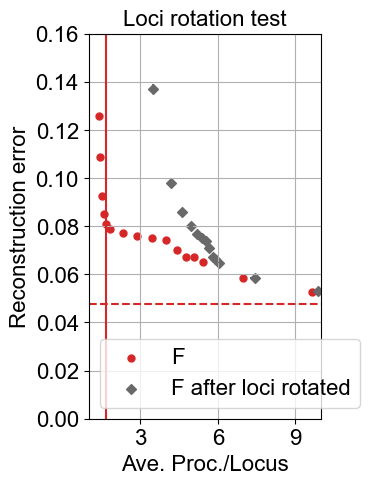

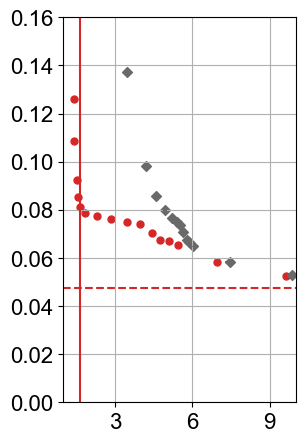

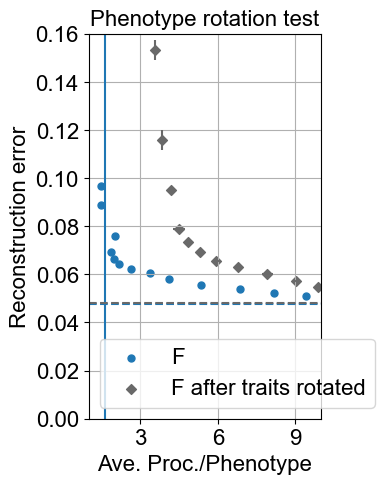

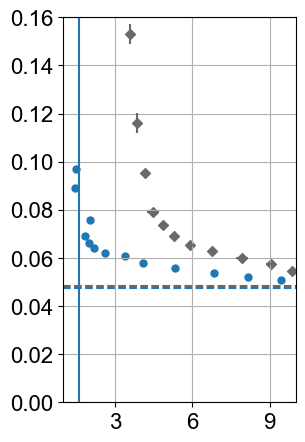


m = 0.2, w = 1.0
19


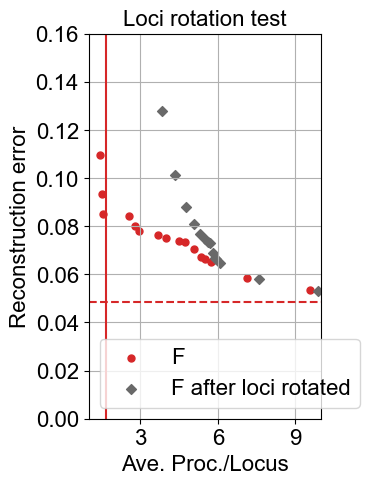

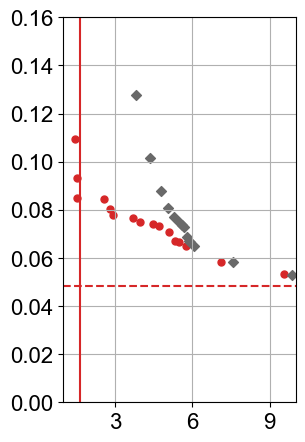

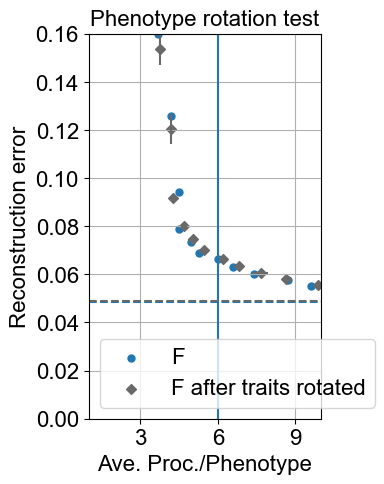

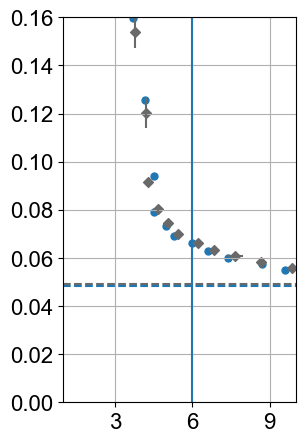


m = 1.0, w = 0.2
20


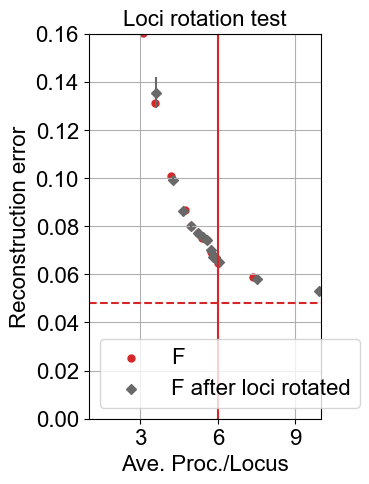

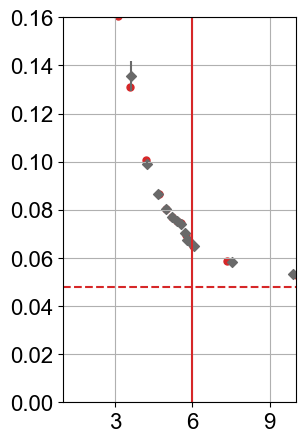

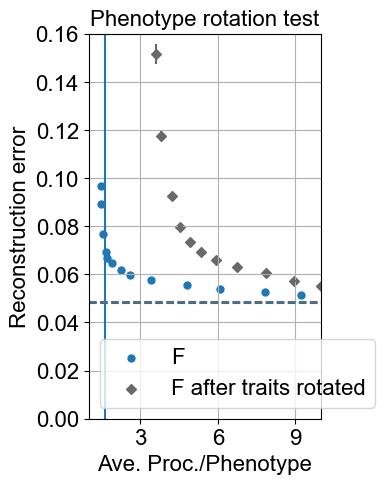

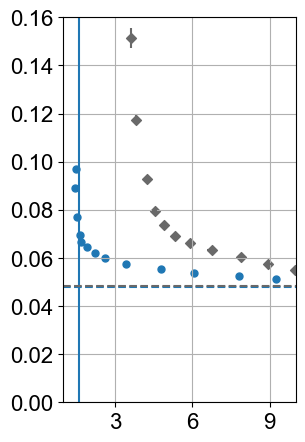


m = 1.0, w = 1.0
20


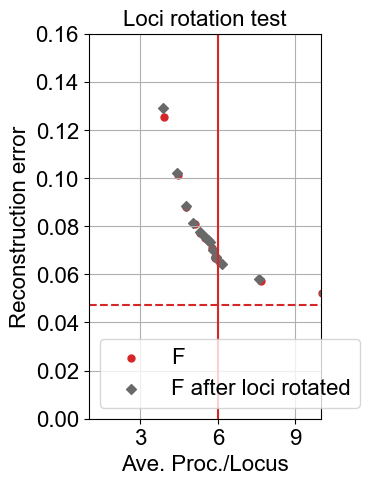

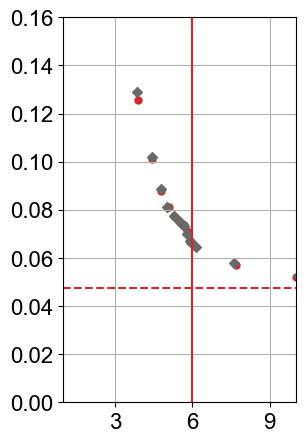

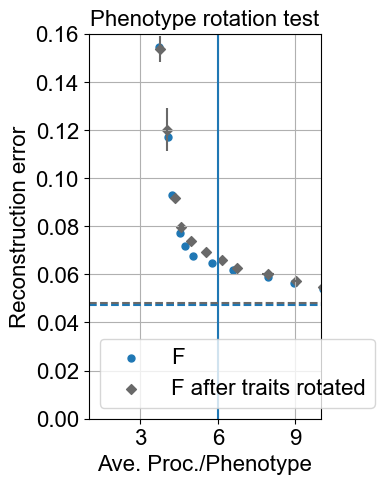

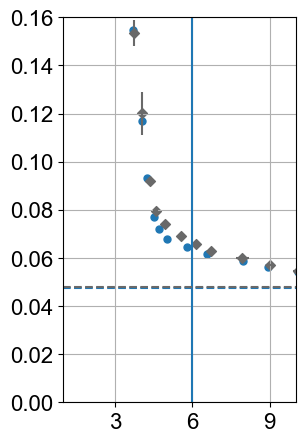

In [5]:
yrange = (0,.16)
xrange = (1,10)
figsize = (3,5)
for m in [m_sparse,m_not]:
    for w in [w_sparse, w_not]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        fct = fcts[(name ,None,None)]
        K = fct.computed_params(printout = False)[0][1]
        print(K)
        fct_rots = [fcts[(name, None, i)] for i in [3,4,5]] 
        rotate = "loci"
        #plot_rotation_test(fct, fct_rot, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None)
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None, figsize = figsize, xticks = [3,6,9], oc='tab:red', rotc='dimgrey')
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = f"{fig_loc}/loci_rot_test_{m}_{w}.svg", figsize = figsize, xticks = [3,6,9], oc='tab:red', rotc='dimgrey', labels= False, legend = False)

        fct_rots = [fcts[(name, i, None)] for i in [0,1,2]] 
        rotate = "env"
        #plot_rotation_test(fct, fct_rot, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None)
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None, figsize = figsize,  xticks = [3,6,9], oc='tab:blue', rotc='dimgrey')
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = f"{fig_loc}/trait_rot_test_{m}_{w}.svg", figsize = figsize,  xticks = [3,6,9], oc='tab:blue', rotc='dimgrey', labels= False, legend = False)



In [6]:
circled_points = {}
circled_points[(.2,.2)] = [(1.7, 1.6)]
circled_points[(.2,1.0)] = [(1.7, 5.5)]
circled_points[(1.0, .2)] = [(5.3, 1.5)]
circled_points[(1.0, 1.0)] = [(5.3, 5.3)]


m = 0.2, w = 0.2
20
('reg', 20, (0.0032, 0.4433), (0, 0)) 1.6715328467153285 1.635135135135135 6 0.0858187901252424


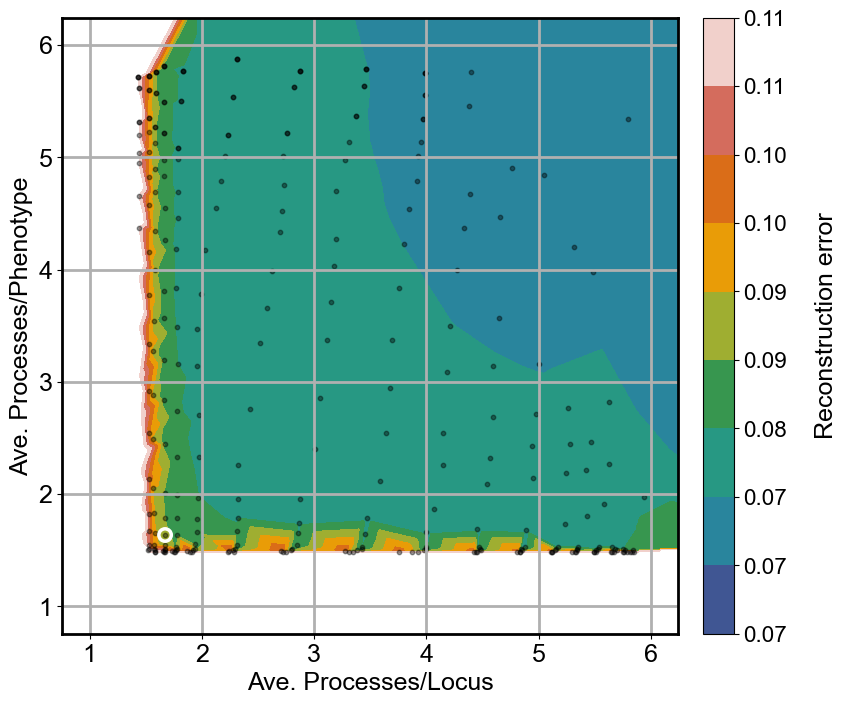

('reg', 20, (0.0032, 0.4433), (0, 0)) 1.6715328467153285 1.635135135135135 6 0.0858187901252424


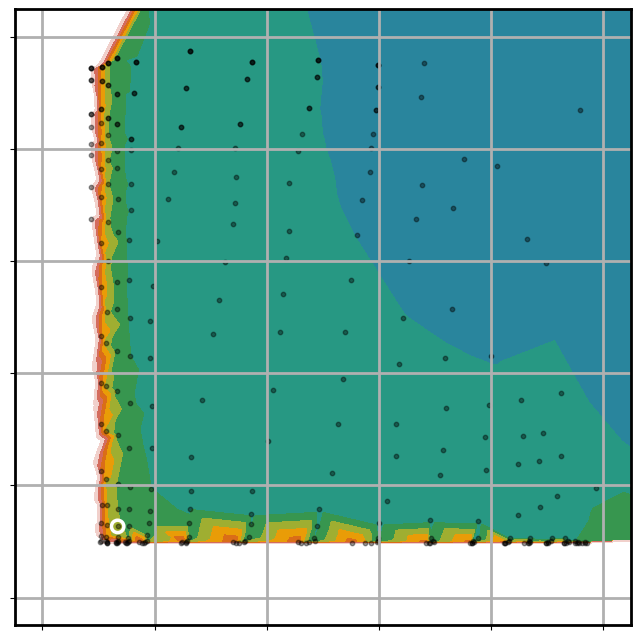


m = 0.2, w = 1.0
19
('reg', 19, (0.0022, 0.6013), (0, 0)) 1.6488549618320612 5.583333333333333 6 0.08725623393945943


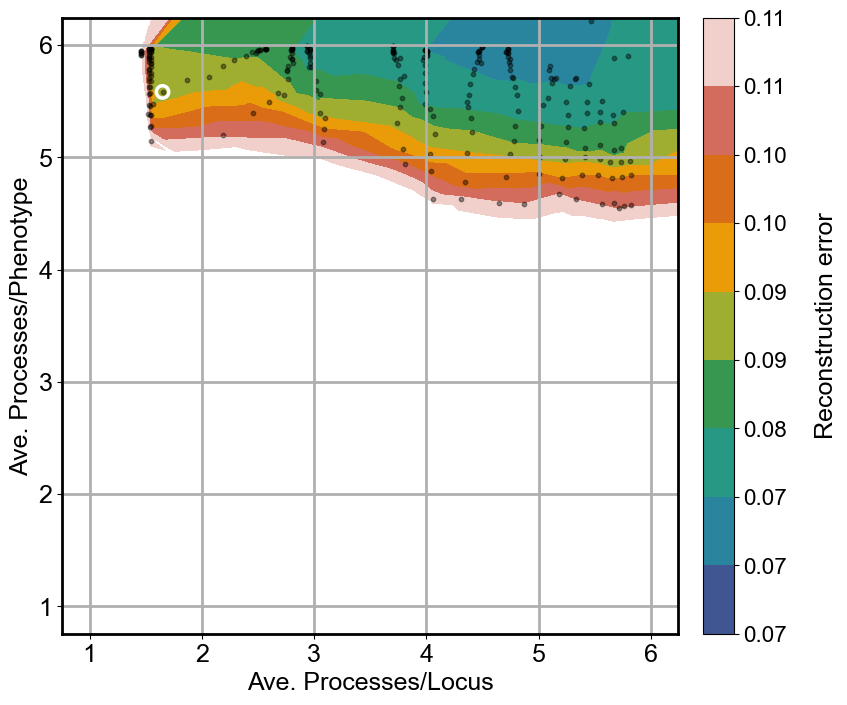

('reg', 19, (0.0022, 0.6013), (0, 0)) 1.6488549618320612 5.583333333333333 6 0.08725623393945943


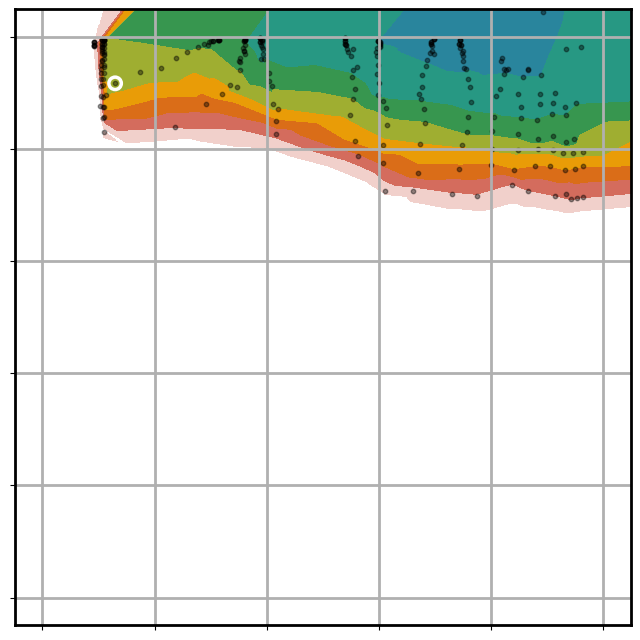


m = 1.0, w = 0.2
20
('reg', 20, (0.0046, 0.1777), (0, 0)) 5.27 1.536231884057971 6 0.08489345589406794


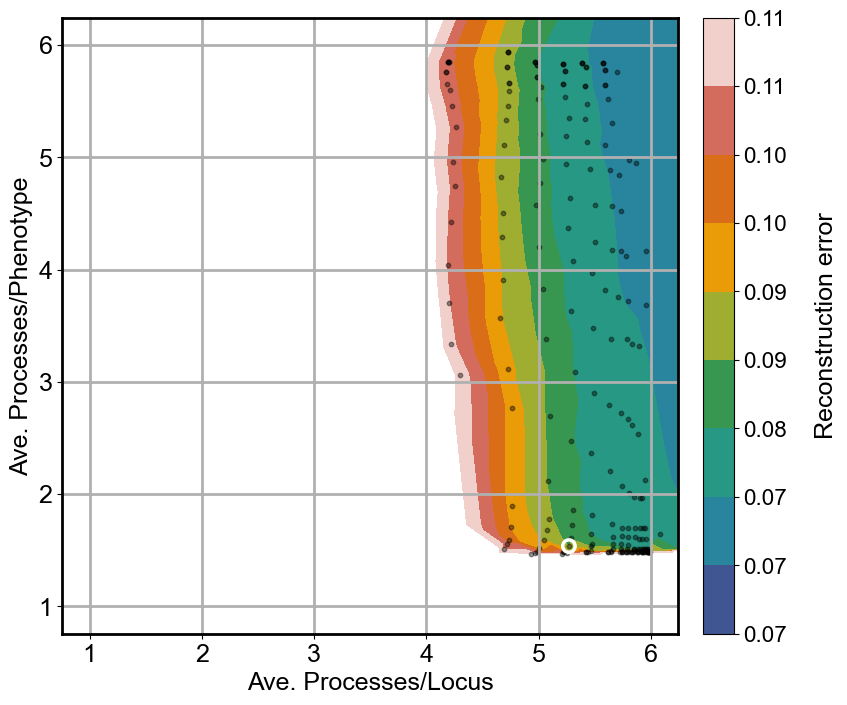

('reg', 20, (0.0046, 0.1777), (0, 0)) 5.27 1.536231884057971 6 0.08489345589406794


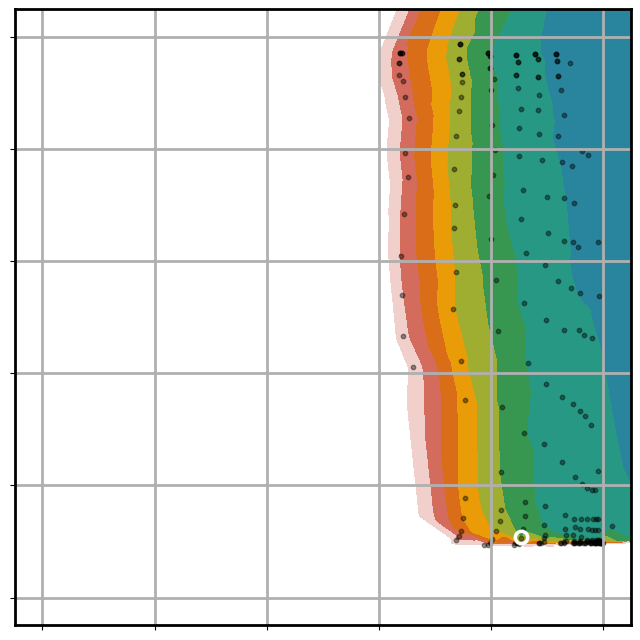


m = 1.0, w = 1.0
20
('reg', 20, (0.0032, 0.241), (0, 0)) 5.315 5.208333333333333 6 0.089107324138114


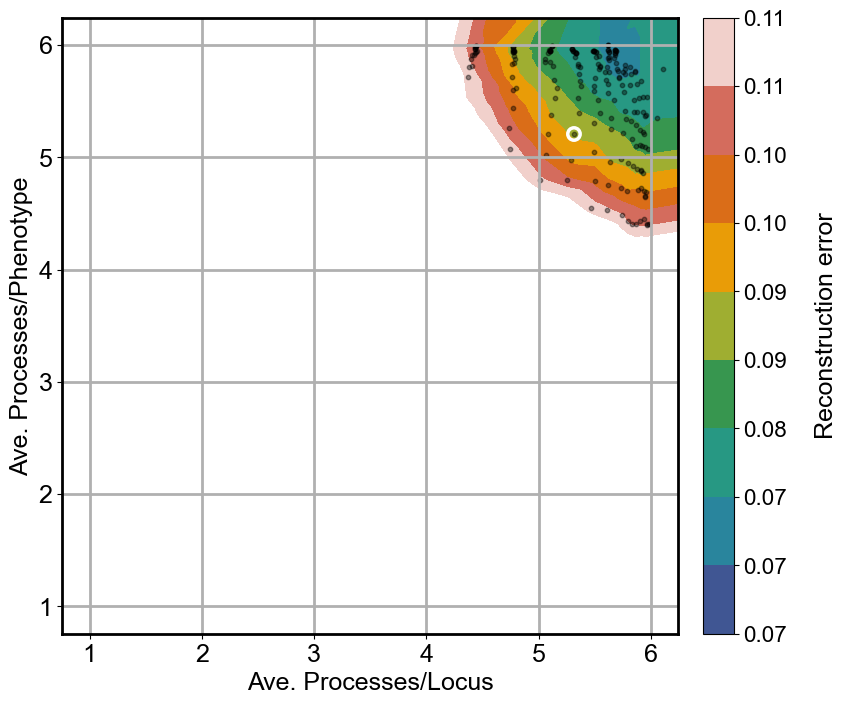

('reg', 20, (0.0032, 0.241), (0, 0)) 5.315 5.208333333333333 6 0.089107324138114


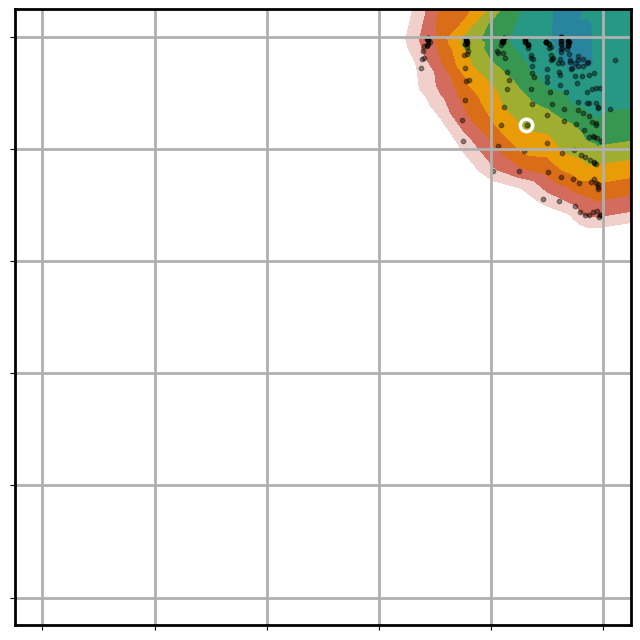

In [7]:


for m in [m_sparse,m_not]:
    for w in [w_sparse, w_not]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        fct = fcts[(name ,None,None)]
        K = fct.computed_params(printout = False)[0][1]
        print(K)
        scatter = True
        ve = .25
        minx = 1-ve
        maxx = 6+ve
        miny = 1-ve
        maxy = 6+ve
        vmax = 0.11
        vmin = 0.065

        plot_solution_space(fct, K, lamb1_range,lamb2_range[6:], minx, maxx, miny, maxy, vmax, vmin, scatter=True, scatter_restricted=True, restrict_in_range = False, k_labeled_points = None, circled_points = circled_points[(m,w)], save_name = None)
        plot_solution_space(fct, K, lamb1_range,lamb2_range[6:], minx, maxx, miny, maxy, vmax, vmin, scatter=True, scatter_restricted=True, restrict_in_range = False, k_labeled_points = None, circled_points = circled_points[(m,w)], labels= False, legend = False, save_name = f"{fig_loc}/solution_space_{m}_{w}.svg")



m = 0.2, w = 0.2
Our Reconstruction error: 0.086
SVD Reconstruction error: 0.073
Our M err: 0.008
SVD M err: 0.164
Our W cos err: 0.064
SVD W cos err: 0.397


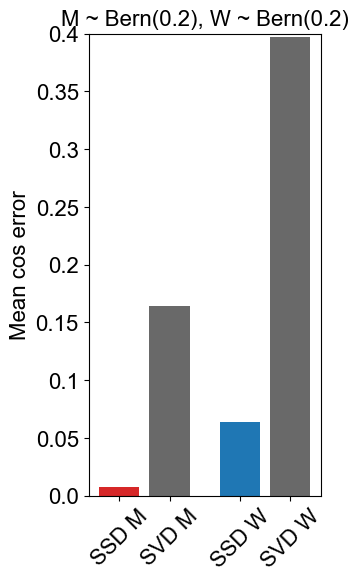

Our Reconstruction error: 0.086
SVD Reconstruction error: 0.073
Our M err: 0.008
SVD M err: 0.164
Our W cos err: 0.064
SVD W cos err: 0.397


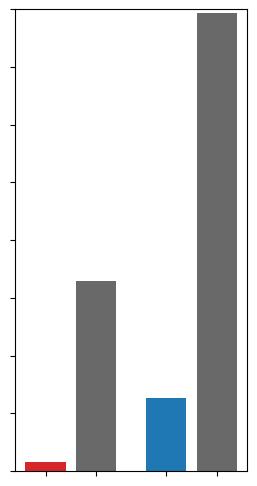


m = 0.2, w = 1.0
Our Reconstruction error: 0.087
SVD Reconstruction error: 0.072
Our M err: 0.004
SVD M err: 0.399
Our W cos err: 0.006
SVD W cos err: 0.370


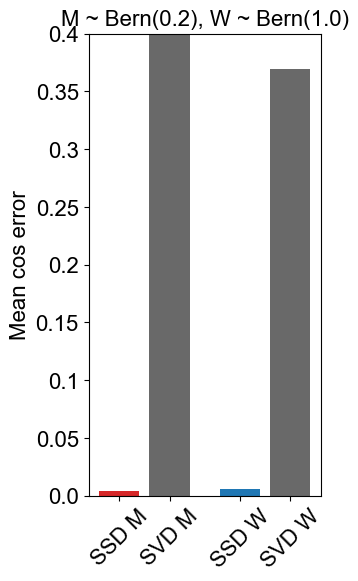

Our Reconstruction error: 0.087
SVD Reconstruction error: 0.072
Our M err: 0.004
SVD M err: 0.399
Our W cos err: 0.006
SVD W cos err: 0.370


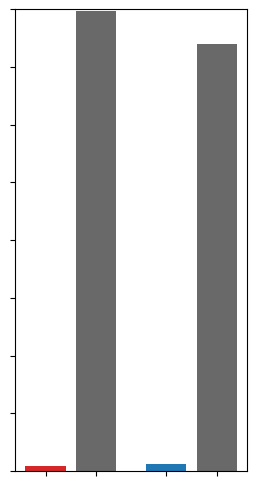


m = 1.0, w = 0.2
Our Reconstruction error: 0.085
SVD Reconstruction error: 0.073
Our M err: 0.011
SVD M err: 0.109
Our W cos err: 0.012
SVD W cos err: 0.353


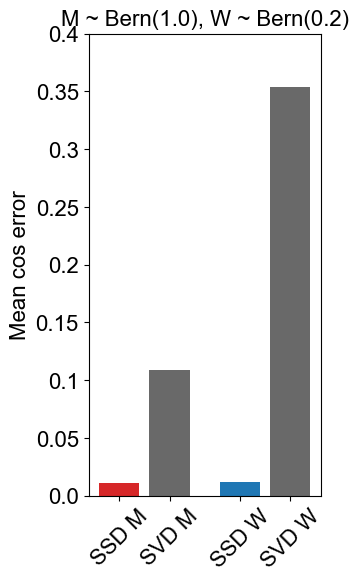

Our Reconstruction error: 0.085
SVD Reconstruction error: 0.073
Our M err: 0.011
SVD M err: 0.109
Our W cos err: 0.012
SVD W cos err: 0.353


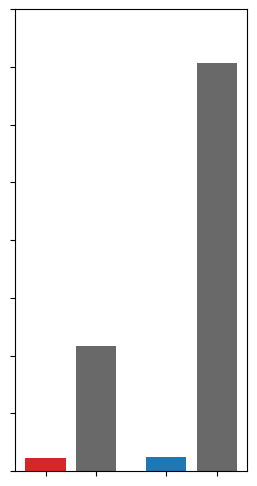


m = 1.0, w = 1.0
Our Reconstruction error: 0.089
SVD Reconstruction error: 0.073
Our M err: 0.288
SVD M err: 0.279
Our W cos err: 0.281
SVD W cos err: 0.276


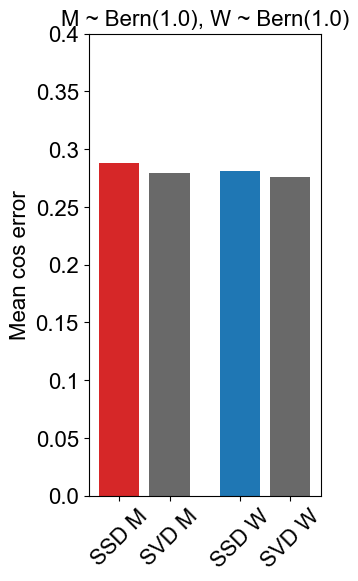

Our Reconstruction error: 0.089
SVD Reconstruction error: 0.073
Our M err: 0.288
SVD M err: 0.279
Our W cos err: 0.281
SVD W cos err: 0.276


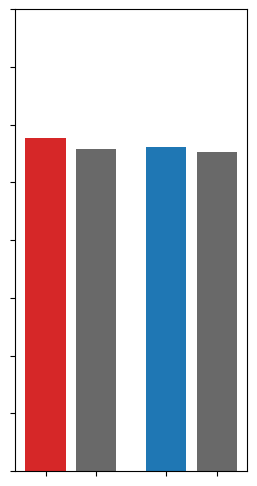

In [8]:
mws = 0
k = 6
m_sparse, m_not = 0.2, 1.0
w_sparse, w_not = 0.2, 1.0
fs = 16
k=6
for m in [m_sparse,m_not]:
    for w in [w_sparse,w_not]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        pt = circled_points[(m,w)][0]
        bar_plot_M_W_error(fcts, name, pt,k,colors = ['tab:red', 'dimgrey' ,'tab:blue', 'dimgrey']) 
        bar_plot_M_W_error(fcts, name, pt,k,colors = ['tab:red', 'dimgrey' ,'tab:blue', 'dimgrey'], labels= False, save_name = f"{fig_loc}/bar_plot_{m}_{w}.svg") 
        plt.show()

## Figures below not for paper; just to sanity check and explain imperfect case of SSD W


m = 0.2, w = 0.2
('syn_ind', 0.2, 0.2, 0)
Our Reconstruction error: 0.086
SVD Reconstruction error: 0.048
Our M err: 0.008
SVD M err: 0.403
num dropped envs: 22 
num true 0 envs: 26 
Our W cos err: 0.064
SVD W cos err: 0.647


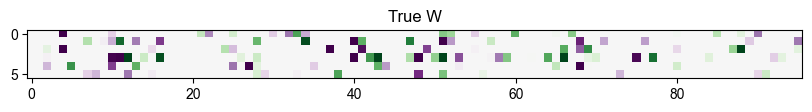

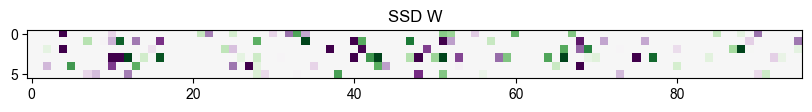

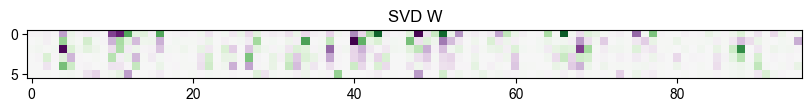

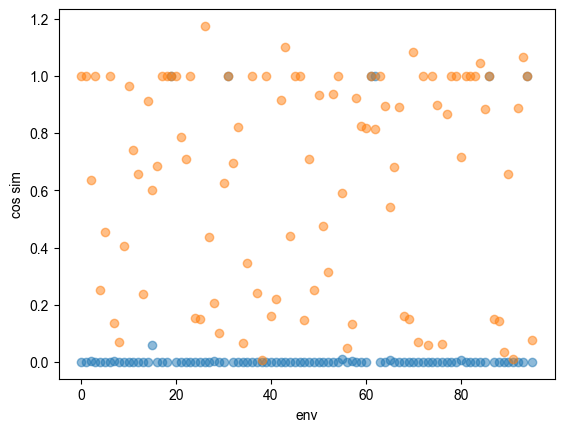


m = 0.2, w = 1.0
('syn_ind', 0.2, 1.0, 0)
Our Reconstruction error: 0.087
SVD Reconstruction error: 0.049
Our M err: 0.004
SVD M err: 0.793
num dropped envs: 0 
num true 0 envs: 0 
Our W cos err: 0.006
SVD W cos err: 0.791


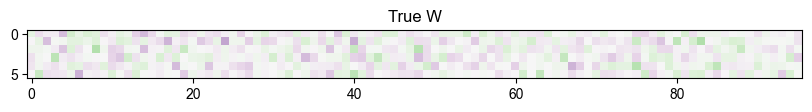

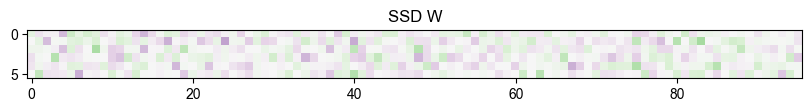

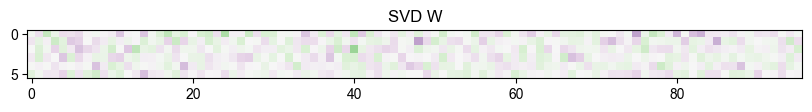

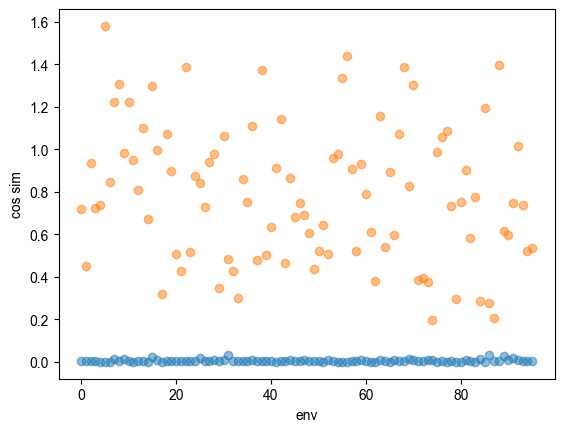


m = 1.0, w = 0.2
('syn_ind', 1.0, 0.2, 0)
Our Reconstruction error: 0.085
SVD Reconstruction error: 0.048
Our M err: 0.011
SVD M err: 0.394
num dropped envs: 27 
num true 0 envs: 26 
Our W cos err: 0.012
SVD W cos err: 0.648


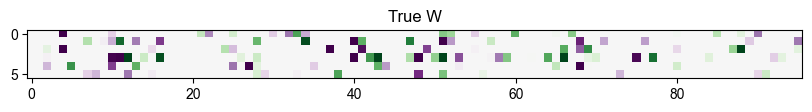

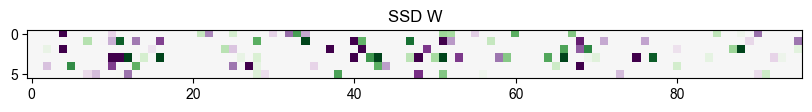

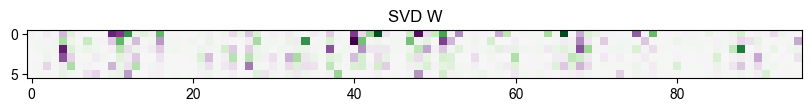

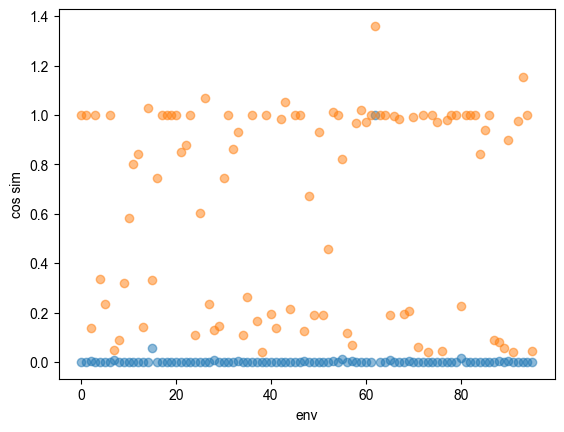


m = 1.0, w = 1.0
('syn_ind', 1.0, 1.0, 0)
Our Reconstruction error: 0.089
SVD Reconstruction error: 0.047
Our M err: 0.288
SVD M err: 0.793
num dropped envs: 0 
num true 0 envs: 0 
Our W cos err: 0.281
SVD W cos err: 0.819


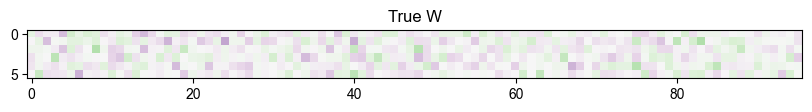

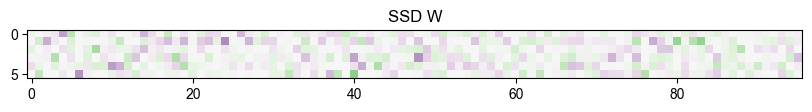

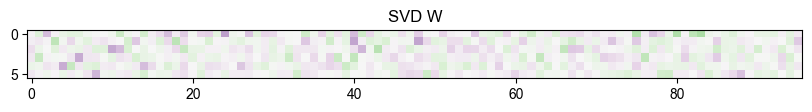

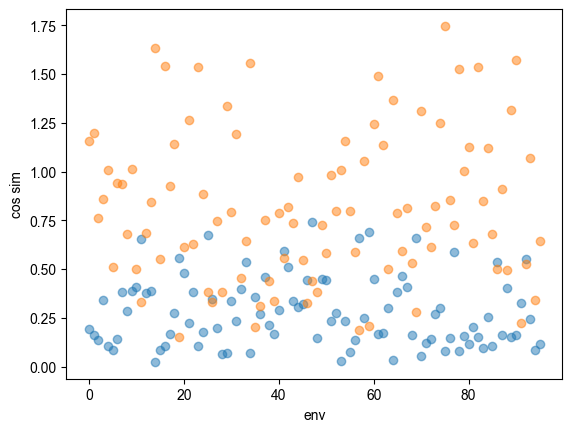

In [9]:
mws = 0
k = 6
m_sparse, m_not = 0.2, 1.0
w_sparse, w_not = 0.2, 1.0
fs = 16
k=6
for m in [m_sparse,m_not]:
    for w in [w_sparse,w_not]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        pt = circled_points[(m,w)][0]
        compare_Ws(fcts, name, pt)
        plt.show()

## For different levels of sparsity

In [10]:
fig_loc = "figures/syn_ind"
mode = "syn_ind"
directory = "pickled_factorizers"

fcts= pickle.load(open(f"{directory}/{mode}","rb"))
triples = pickle.load(open(f"{directory}/triples_{mode}","rb"))

lamb2_range = 10**(np.linspace(np.log10(1e-3),np.log10(1.5),25))
lamb1_range = 10**(np.linspace(np.log10(1e-4),np.log10(1e-2),25))
lamb1_fixed = [1e-4]
lamb2_fixed = [1e-3]

svd_k = 6
mws = 0





m = 0.2, w = 1.0
19


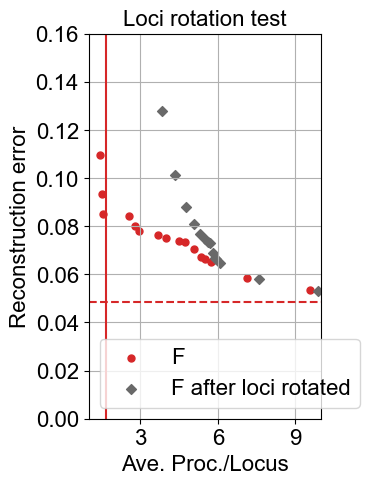

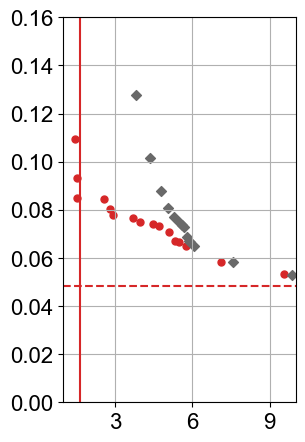


m = 0.4, w = 1.0


KeyError: (('syn_ind', 0.4, 1.0, 0), None, None)

In [11]:
yrange = (0,.16)
xrange = (1,10)
figsize = (3,5)
for m in [0.2, 0.4, 0.6, 0.8]:
    for w in [1.0]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        fct = fcts[(name ,None,None)]
        K = fct.computed_params(printout = False)[0][1]
        print(K)
        fct_rots = [fcts[(name, None, i)] for i in [3,4,5]] 
        rotate = "loci"
        #plot_rotation_test(fct, fct_rot, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None)
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None, figsize = figsize, xticks = [3,6,9], oc='tab:red', rotc='dimgrey')
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = f"{fig_loc}/supp_loci_rot_test_{m}_{w}.svg", figsize = figsize, xticks = [3,6,9], oc='tab:red', rotc='dimgrey', labels= False, legend = False)


In [ ]:
yrange = (0,.16)
xrange = (1,10)
figsize = (3,5)
for w in [0.2, 0.4, 0.6, 0.8]:
    for m in [1.0]:
        print(f"\nm = {m}, w = {w}")
        name = (mode, m,w,mws)
        fct = fcts[(name ,None,None)]
        K = fct.computed_params(printout = False)[0][1]
        print(K)
        
        fct_rots = [fcts[(name, i, None)] for i in [0,1,2]] 
        rotate = "env"
        #plot_rotation_test(fct, fct_rot, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None)
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = None, figsize = figsize,  xticks = [3,6,9], oc='tab:blue', rotc='dimgrey')
        plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 16, svd_k=K, true_line = True, save_name = f"{fig_loc}/supp_trait_rot_test_{m}_{w}.svg", figsize = figsize,  xticks = [3,6,9], oc='tab:blue', rotc='dimgrey', labels= False, legend = False)
